## Bias and Variance Tradeoff

Bias - We define bias as the error between average model prediction and the ground truth

Variance - Variance is an error caused by an algorithm that is too sensitive to fluctuation in data. 

Bias - Variance Tradeoff - Minimizine the error caused by oversimplified and excessive complication requires finding the right balance. 

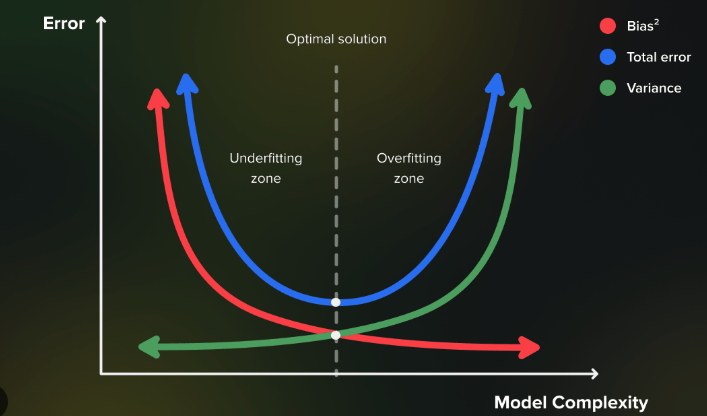

In [1]:
# libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,mean_squared_error

In [2]:
# load data
data = fetch_california_housing()
X = data.data
y = data.target

In [3]:
# split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [4]:
# Initialize Models 

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5), 
    # 'SVR': SVR(kernel='linear')
}

In [5]:
X_train.shape, y_train.shape

((16512, 8), (16512,))

In [6]:
# Train and evaluate the model 

for name, model in models.items():
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    print(f"{name} - Train MSE {train_mse}, and Test MSE is {test_mse}")

Linear Regression - Train MSE 0.5179331255246696, and Test MSE is 0.5558915986952425
Decision Tree - Train MSE 0.4843432765009063, and Test MSE is 0.5245146178314735


In [7]:
# Varying the complexity of the Decision Tree
train_errors, test_errors = [], []
depths = range(1,21)

for depth in depths:
    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, train_preds))
    test_errors.append(mean_squared_error(y_test, test_preds))

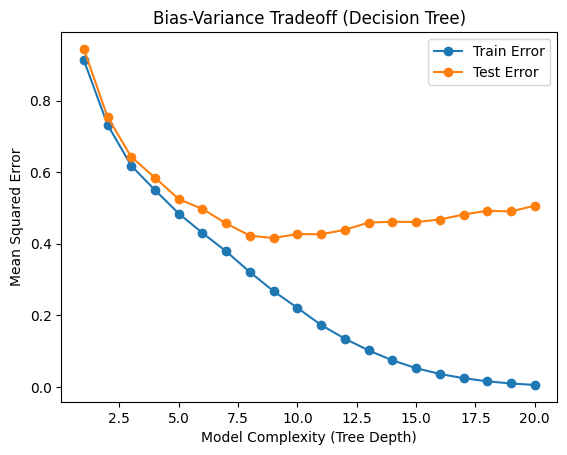

In [8]:
# Plotting the error curves
plt.plot(depths, train_errors, label='Train Error', marker='o')
plt.plot(depths, test_errors, label='Test Error', marker='o')
plt.xlabel('Model Complexity (Tree Depth)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Bias-Variance Tradeoff (Decision Tree)')
plt.show()